# L2 Regularized Logistic Regression Model

This demo file provides an example of using my L2 Regularized Logistic Regression model built with numpy to classify tumors in the Wisconsin Breast Cancer Dataset as benign or cancerous.  This demo also includes how to implement my from-scratch K fold cross-validation method to find the optimal lambda penalty value for the regression model.

- **Dataset:** https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html
- **Author:** Joel Stremmel (jstremme@uw.edu)
- **Credits:** University of Washington DATA 558 with Zaid Harchaoui and Corinne Jones

### Import Standard Scikit-Learn Functionality

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_recall_fscore_support as score

### Import Dataset

In [2]:
from sklearn.datasets import load_breast_cancer

### Import Methods for Modeling Training and Analysis

In [3]:
from l2_regularized_logistic_regression import *

### Load Data and Separate Features and Targets

In [4]:
data = load_breast_cancer()
X = data.data
y = data.target
features = data.target_names

### Train Test Split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

### Scale Input Data and Transform Binary Targets to [-1, 1]

In [6]:
X_scaler = StandardScaler()
X_train = X_scaler.fit_transform(X_train)
X_test = X_scaler.transform(X_test)
y_train = transform_target(y_train)
y_test = transform_target(y_test)

### Train L2 Regularized Logistic Regression

In [7]:
beta_vals = l2_log_reg(X_train, y_train, lambda_penalty=1.0, eps=0.001, v=0)

### Visualize Value of Object from Each Iteration of Gradient Descent

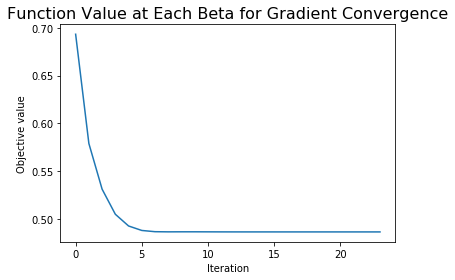

In [8]:
plot_objective_values(X_train, y_train, beta_vals, lambda_penalty=1.0)

### Predict with Each Coefficient Vector on Train and Test

In [9]:
train_pred_vals = predict_all(beta_vals, X_train)
test_pred_vals = predict_all(beta_vals, X_test)

### Visualize Misclassification Error at Each Step of Gradient Descent

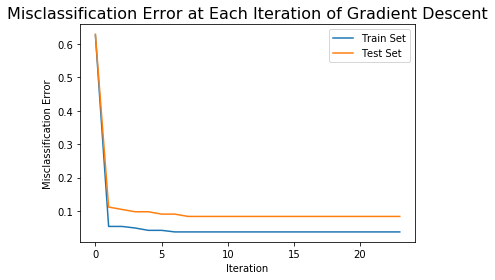

In [10]:
plot_errors(train_pred_vals, test_pred_vals, y_train, y_test, labels=['Train Set', 'Test Set'])

### Use K Fold Cross Validation to Find the Optimal Lambda Value

In [11]:
lambdas = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
mean_test_errors = k_fold_crossval(X_train, y_train, lambdas, k=5, eps=0.001)

Lambda=0.001 mean misclassification error on test sets: 0.01163
Lambda=0.01 mean misclassification error on test sets: 0.01395
Lambda=0.1 mean misclassification error on test sets: 0.02558
Lambda=1 mean misclassification error on test sets: 0.03488
Lambda=10 mean misclassification error on test sets: 0.05581
Lambda=100 mean misclassification error on test sets: 0.04884
Lambda=1000 mean misclassification error on test sets: 0.05116


In [12]:
best_lambda = lambdas[np.argmin(mean_test_errors)]
print('Best lambda: {}'.format(best_lambda))

Best lambda: 0.001


### Retrain L2 Regularized Logistic Regression with Optimal Lambda

In [13]:
beta_vals = l2_log_reg(X_train, y_train, lambda_penalty=best_lambda, eps=0.001, v=0)

### Predict with Each Coefficient Vector on Train and Test

In [14]:
train_pred_vals = predict_all(beta_vals, X_train)
test_pred_vals = predict_all(beta_vals, X_test)

### Visualize Misclassification Error at Each Step of Gradient Descent

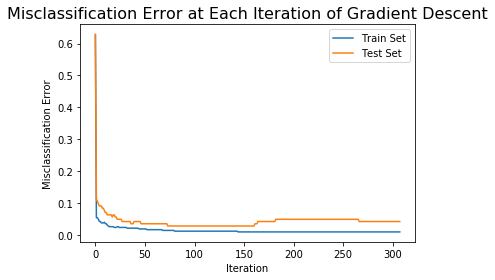

In [15]:
plot_errors(train_pred_vals, test_pred_vals, y_train, y_test, labels=['Train Set', 'Test Set'])

### Calculate Precision and Recall with the Final Beta from Training

In [16]:
train_precision, train_recall, train_fscore, train_support = score(y_train, train_pred_vals[-1])
val_precision, val_recall, val_fscore, val_support = score(y_test, test_pred_vals[-1])

pr_df = pd.DataFrame({'Class': list(range(0, 2)),
                      'TrainPrecision': train_precision,
                      'TrainRecall': train_recall,
                      'ValidationPrecision': val_precision,
                      'ValidationRecall': val_recall})
pr_df

,Class,TrainPrecision,TrainRecall,ValidationPrecision,ValidationRecall
0,0,1.00000,0.974843,0.943396,0.943396
1,1,0.98524,1.000000,0.966667,0.966667
